##Notebook content:
1. Basic descriptive analysis
   
     1.1. Data types
   
     1.2. Basic statistics
   
     1.3. Missing values
   
     1.4. Duplicates
   
3. Visualisations

In [6]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [7]:
# importing dataframe 
path = r"C:\Users\Acer\Desktop\World Happiness Report\02 Data"

In [8]:
# importing 2015 dataframe from original folder
dataset = pd.read_csv(os.path.join(path,'Original Data','2015.csv'),index_col=False)

In [23]:
df = pd.read_csv(os.path.join(path,'Original Data','2015.csv'),index_col=False)

In [24]:
# visualising dataframe
dataset.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


1. Basic Descriptive analysis

 1.1 Data Types

In [10]:
# visualisating data type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [11]:
# Updating 'categorical' relevant columns that were saved as object
dataset[['Country', 'Region']] = dataset[['Country', 'Region']].astype('category')



In [12]:
# vialuasing data type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Country                        158 non-null    category
 1   Region                         158 non-null    category
 2   Happiness Rank                 158 non-null    int64   
 3   Happiness Score                158 non-null    float64 
 4   Standard Error                 158 non-null    float64 
 5   Economy (GDP per Capita)       158 non-null    float64 
 6   Family                         158 non-null    float64 
 7   Health (Life Expectancy)       158 non-null    float64 
 8   Freedom                        158 non-null    float64 
 9   Trust (Government Corruption)  158 non-null    float64 
 10  Generosity                     158 non-null    float64 
 11  Dystopia Residual              158 non-null    float64 
dtypes: category(2), float64(9), int64(1)

In [13]:
# Checking for mixed-type data

for col in dataset.columns.tolist():
    weird = (dataset[[col]].applymap(type) != dataset[[col]].iloc[0].apply(type)).any(axis = 1)
    if len (dataset[weird]) > 0:
        print (col)

C:\Users\Acer\AppData\Local\Temp\ipykernel_14612\704874954.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (dataset[[col]].applymap(type) != dataset[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Acer\AppData\Local\Temp\ipykernel_14612\704874954.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (dataset[[col]].applymap(type) != dataset[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Acer\AppData\Local\Temp\ipykernel_14612\704874954.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (dataset[[col]].applymap(type) != dataset[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Acer\AppData\Local\Temp\ipykernel_14612\704874954.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (dataset[[col]].applymap(type) != dataset[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Acer\AppData\Local\Temp\ipy

1.2 Basic Statistics

In [14]:
# Basic statistics to quantitative data

dataset.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [15]:
# Basic statistics to Happiness
stats_Happiness = dataset[['Happiness Rank', 'Happiness Score']].agg(['min', 'max'])
print(stats_Happiness)

     Happiness Rank  Happiness Score
min               1            2.839
max             158            7.587


In [24]:
# Basic statistics to Categorical
stats_Happiness = dataset[['Happiness Rank', 'Happiness Score']].agg(['min', 'max'])
print(stats_Happiness)

     Happiness Rank  Happiness Score
min               1            2.839
max             158            7.587


1.3 Missing Values

In [16]:
# Finding out columns with missing values
dataset.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

Zero missing values

1.4 Duplicates

In [17]:
# Find duplicate values

dataset_dups = dataset[dataset.duplicated()]
dataset_dups

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


2. Visualisations

In [27]:
# Load the dataset
data = {
    'Country': ["Switzerland", "Iceland", "Denmark", "Norway", "Canada", "Finland", "Netherlands", "Sweden", "New Zealand", "Australia", "Israel", "Costa Rica", "Austria", "Mexico", "United States", "Brazil", "Luxembourg", "Ireland", "Belgium", "United Arab Emirates", "United Kingdom", "Oman", "Venezuela", "Singapore", "Panama", "Germany", "Chile", "Qatar", "France", "Argentina", "Czech Republic", "Uruguay", "Colombia", "Thailand", "Saudi Arabia", "Spain", "Malta", "Taiwan", "Kuwait", "Suriname", "Trinidad and Tobago", "El Salvador", "Guatemala", "Uzbekistan", "Slovakia", "Japan", "South Korea", "Ecuador", "Bahrain", "Italy", "Bolivia", "Moldova", "Paraguay", "Kazakhstan", "Slovenia", "Lithuania", "Nicaragua", "Peru", "Belarus", "Poland", "Malaysia", "Croatia", "Libya", "Russia", "Jamaica", "North Cyprus", "Cyprus", "Algeria", "Kosovo", "Turkmenistan", "Mauritius", "Hong Kong", "Estonia", "Indonesia", "Vietnam", "Turkey", "Kyrgyzstan", "Nigeria", "Bhutan", "Azerbaijan", "Pakistan", "Jordan", "Montenegro", "China", "Zambia", "Romania", "Serbia", "Portugal", "Latvia", "Philippines", "Somaliland region", "Morocco", "Macedonia", "Mozambique", "Albania", "Bosnia and Herzegovina", "Lesotho", "Dominican Republic", "Laos", "Mongolia", "Swaziland", "Greece", "Lebanon", "Hungary", "Honduras", "Tajikistan", "Tunisia", "Palestinian Territories", "Bangladesh", "Iran", "Ukraine", "Iraq", "South Africa", "Ghana", "Zimbabwe", "Liberia", "India", "Sudan", "Haiti", "Congo (Kinshasa)", "Nepal", "Ethiopia", "Sierra Leone", "Mauritania", "Kenya", "Djibouti", "Armenia", "Botswana", "Myanmar", "Georgia", "Malawi", "Sri Lanka", "Cameroon", "Bulgaria", "Egypt", "Yemen", "Angola", "Mali", "Congo (Brazzaville)", "Comoros", "Uganda", "Senegal", "Gabon", "Niger", "Cambodia", "Tanzania", "Madagascar", "Central African Republic", "Chad", "Guinea", "Ivory Coast", "Burkina Faso", "Afghanistan", "Rwanda", "Benin", "Syria", "Burundi", "Togo"],
    'Happiness_Rank': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 82, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158],}


In [26]:
df = pd.DataFrame(dataset)

In [27]:
# Display all the rows of the dataset
df.head(158)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [30]:
# Creating a DataFrame with Happiness Rank and Happiness Score
data = {
    'Happiness_Rank': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 82, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158],
    'Happiness_Score': [7.587, 7.561, 7.527, 7.522, 7.427, 7.406, 7.378, 7.364, 7.286, 7.284, 7.278, 7.226, 7.2, 7.187, 7.119, 6.983, 6.946, 6.94, 6.937, 6.901, 6.867, 6.853, 6.81, 6.798, 6.786, 6.75, 6.67, 6.611, 6.575, 6.574, 6.505, 6.485, 6.477, 6.455, 6.411, 6.329, 6.302, 6.298, 6.295, 6.269, 6.168, 6.13, 6.123, 6.003, 5.995, 5.987, 5.984, 5.975, 5.96, 5.948, 5.89, 5.889, 5.878, 5.855, 5.848, 5.833, 5.828, 5.824, 5.813, 5.791, 5.77, 5.759, 5.754, 5.716, 5.709, 5.695, 5.689, 5.605, 5.589, 5.548, 5.477, 5.474, 5.429, 5.399, 5.36, 5.332, 5.286, 5.268, 5.253, 5.212, 5.194, 5.192, 5.192, 5.14, 5.129, 5.124, 5.123, 5.102, 5.098, 5.073, 5.057, 5.013, 5.007, 4.971, 4.959, 4.949, 4.898, 4.885, 4.876, 4.874, 4.867, 4.857, 4.839, 4.8, 4.788, 4.786, 4.739, 4.715, 4.694, 4.686, 4.681, 4.677, 4.642, 4.633, 4.61, 4.571, 4.565, 4.55, 4.518, 4.517, 4.514, 4.512, 4.507, 4.436, 4.419, 4.369, 4.35, 4.332, 4.307, 4.297, 4.292, 4.271, 4.252, 4.218, 4.194, 4.077, 4.033, 3.995, 3.989, 3.956, 3.931, 3.904, 3.896, 3.845, 3.819, 3.781, 3.681, 3.678, 3.667, 3.656, 3.655, 3.587, 3.575, 3.465, 3.34, 3.006, 2.905, 2.839]}


In [31]:
df = pd.DataFrame(data)

In [32]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

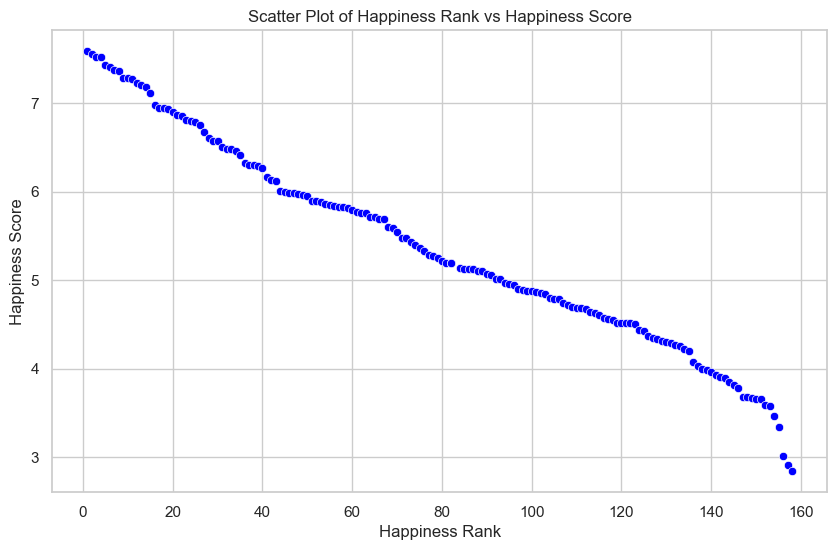

<Figure size 640x480 with 0 Axes>

In [33]:
# Visualization: Scatter plot between Happiness Rank and Happiness Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Happiness_Rank', y='Happiness_Score', data=df, color='blue')
plt.title('Scatter Plot of Happiness Rank vs Happiness Score')
plt.xlabel('Happiness Rank')
plt.ylabel('Happiness Score')
plt.show()
# Specify the directory to save the file
path = r'C:\Users\Acer\Desktop\World Happiness Report\02 Data\04 Analysis\Visualisations'
# Create the directory if it doesn't exist
os.makedirs(path, exist_ok=True)
# Save the figure
plt.savefig(os.path.join(path, 'Scatter_plot_Happiness_Rank.png'))
plt.show()

In [44]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

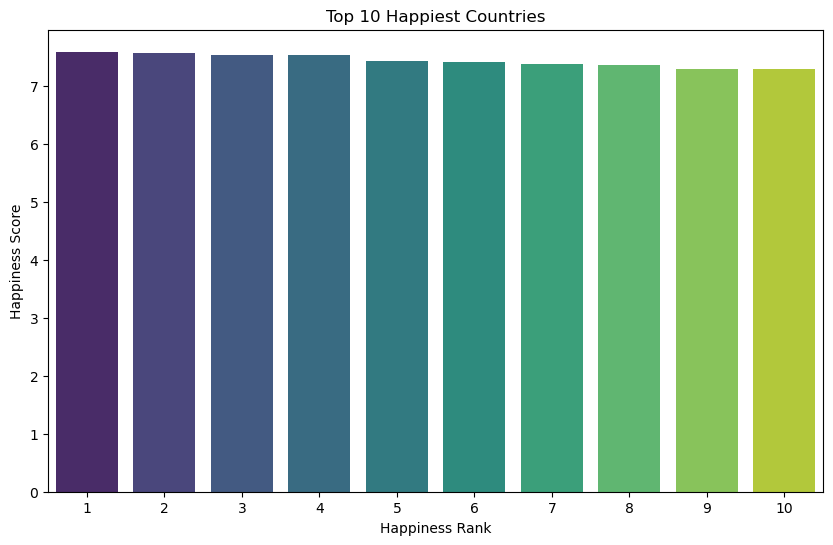

In [32]:
# Visualization 1: Bar plot for the Top 10 Happiest Countries
top_10_countries = df.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Happiness Rank', y='Happiness Score', data=top_10_countries, palette='viridis')
plt.title('Top 10 Happiest Countries')
plt.xlabel('Happiness Rank')
plt.ylabel('Happiness Score')
plt.show()

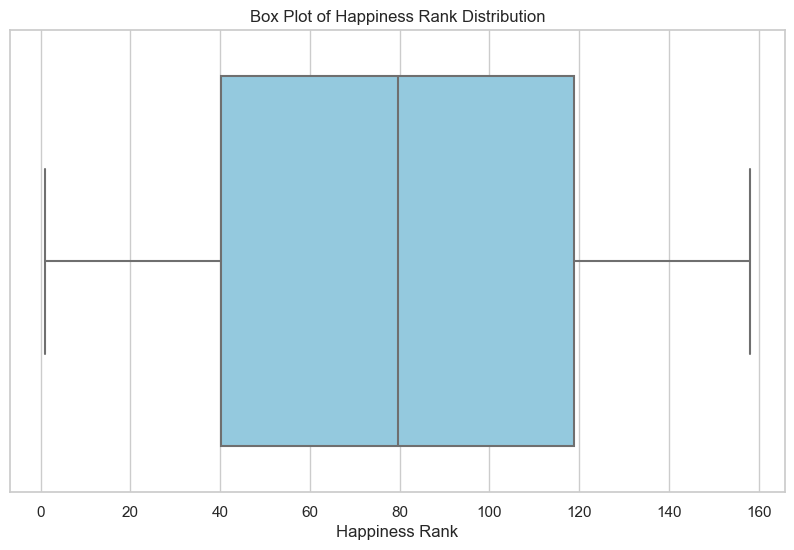

<Figure size 640x480 with 0 Axes>

In [65]:
# Visualization 3: Box plot of Happiness Rank distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Happiness_Rank'], color='skyblue')
plt.title('Box Plot of Happiness Rank Distribution')
plt.xlabel('Happiness Rank')
plt.show()
# Specify the directory to save the file
path = r'C:\Users\Acer\Desktop\World Happiness Report\02 Data\04 Analysis\Visualisations'
# Create the directory if it doesn't exist
os.makedirs(path, exist_ok=True)
# Save the figure
plt.savefig(os.path.join(path, 'Box_plot_Happiness_Rank.png'))
plt.show()

In [85]:
# load dataset
data = { 'Country', 'Trust(Government Corruption)'}

In [87]:
# Display all the rows of the dataset
df.head(158)

,Happiness_Rank,Happiness_Score
0,1,7.587
1,2,7.561
2,3,7.527
3,4,7.522
4,5,7.427
...,...,...
153,154,3.465
154,155,3.340
155,156,3.006
156,157,2.905


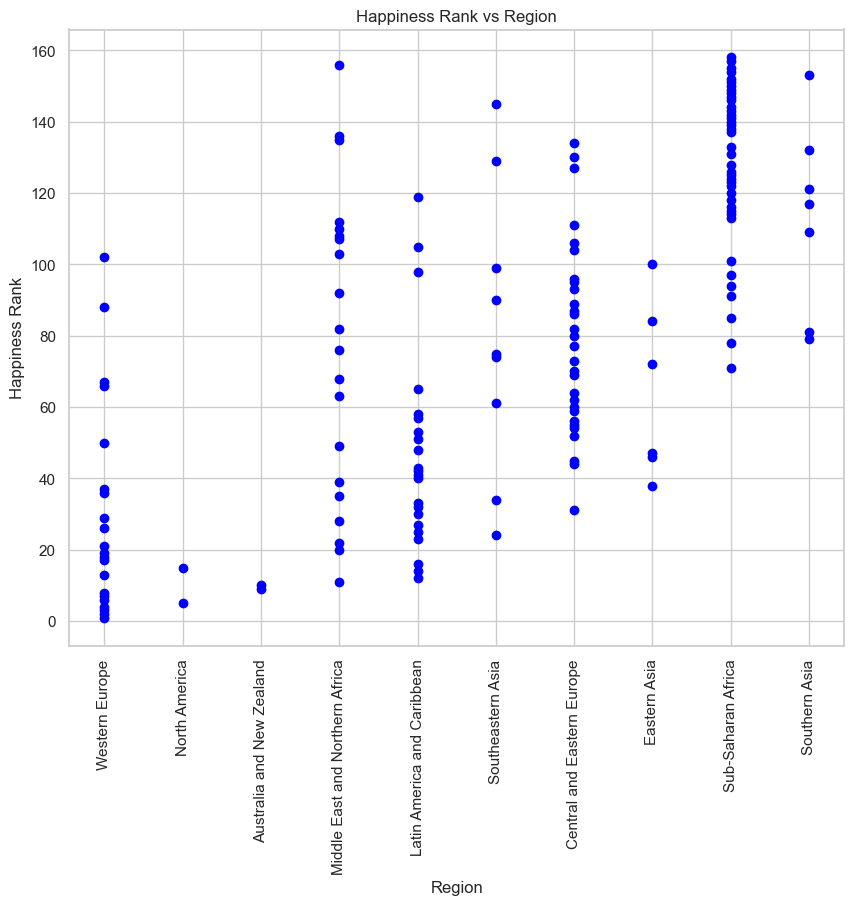

<Figure size 640x480 with 0 Axes>

In [98]:
# Visualisation scatterplot Happiness Rank data
happiness_rank_data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 
                       31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 
                       58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 82, 84, 
                       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 
                       110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 
                       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 
                       154, 155, 156, 157, 158]

# List of regions
regions = ["Western Europe", "Western Europe", "Western Europe", "Western Europe", "North America", "Western Europe", "Western Europe",
           "Western Europe", "Australia and New Zealand", "Australia and New Zealand", "Middle East and Northern Africa",
           "Latin America and Caribbean", "Western Europe", "Latin America and Caribbean", "North America", "Latin America and Caribbean",
           "Western Europe", "Western Europe", "Western Europe", "Middle East and Northern Africa", "Western Europe",
           "Middle East and Northern Africa", "Latin America and Caribbean", "Southeastern Asia", "Latin America and Caribbean",
           "Western Europe", "Latin America and Caribbean", "Middle East and Northern Africa", "Western Europe", "Latin America and Caribbean",
           "Central and Eastern Europe", "Latin America and Caribbean", "Latin America and Caribbean", "Southeastern Asia",
           "Middle East and Northern Africa", "Western Europe", "Western Europe", "Eastern Asia", "Middle East and Northern Africa",
           "Latin America and Caribbean", "Latin America and Caribbean", "Latin America and Caribbean", "Latin America and Caribbean",
           "Central and Eastern Europe", "Central and Eastern Europe", "Eastern Asia", "Eastern Asia", "Latin America and Caribbean",
           "Middle East and Northern Africa", "Western Europe", "Latin America and Caribbean", "Central and Eastern Europe",
           "Latin America and Caribbean", "Central and Eastern Europe", "Central and Eastern Europe", "Central and Eastern Europe",
           "Latin America and Caribbean", "Latin America and Caribbean", "Central and Eastern Europe", "Central and Eastern Europe",
           "Southeastern Asia", "Central and Eastern Europe", "Middle East and Northern Africa", "Central and Eastern Europe",
           "Latin America and Caribbean", "Western Europe", "Western Europe", "Middle East and Northern Africa", "Central and Eastern Europe",
           "Central and Eastern Europe", "Sub-Saharan Africa", "Eastern Asia", "Central and Eastern Europe", "Southeastern Asia",
           "Southeastern Asia", "Middle East and Northern Africa", "Central and Eastern Europe", "Sub-Saharan Africa", "Southern Asia",
           "Central and Eastern Europe", "Southern Asia", "Middle East and Northern Africa", "Central and Eastern Europe", "Eastern Asia",
           "Sub-Saharan Africa", "Central and Eastern Europe", "Central and Eastern Europe", "Western Europe", "Central and Eastern Europe",
           "Southeastern Asia", "Sub-Saharan Africa", "Middle East and Northern Africa", "Central and Eastern Europe", "Sub-Saharan Africa",
           "Central and Eastern Europe", "Central and Eastern Europe", "Sub-Saharan Africa", "Latin America and Caribbean", "Southeastern Asia",
           "Eastern Asia", "Sub-Saharan Africa", "Western Europe", "Middle East and Northern Africa", "Central and Eastern Europe",
           "Latin America and Caribbean", "Central and Eastern Europe", "Middle East and Northern Africa", "Middle East and Northern Africa",
           "Southern Asia", "Middle East and Northern Africa", "Central and Eastern Europe", "Middle East and Northern Africa",
           "Sub-Saharan Africa", "Sub-Saharan Africa", "Sub-Saharan Africa", "Sub-Saharan Africa", "Southern Asia", "Sub-Saharan Africa",
           "Latin America and Caribbean", "Sub-Saharan Africa", "Southern Asia", "Sub-Saharan Africa", "Sub-Saharan Africa",
           "Sub-Saharan Africa", "Sub-Saharan Africa", "Sub-Saharan Africa", "Central and Eastern Europe", "Sub-Saharan Africa",
           "Southeastern Asia", "Central and Eastern Europe", "Sub-Saharan Africa", "Southern Asia", "Sub-Saharan Africa",
           "Central and Eastern Europe", "Middle East and Northern Africa", "Middle East and Northern Africa", "Sub-Saharan Africa",
           "Sub-Saharan Africa", "Sub-Saharan Africa", "Sub-Saharan Africa", "Sub-Saharan Africa", "Sub-Saharan Africa", "Sub-Saharan Africa",
           "Sub-Saharan Africa", "Southeastern Asia", "Sub-Saharan Africa", "Sub-Saharan Africa", "Sub-Saharan Africa", "Sub-Saharan Africa",
           "Sub-Saharan Africa", "Sub-Saharan Africa", "Sub-Saharan Africa", "Southern Asia", "Sub-Saharan Africa", "Sub-Saharan Africa",
           "Middle East and Northern Africa", "Sub-Saharan Africa", "Sub-Saharan Africa"]

# Plotting the Happiness Rank against Regions
plt.figure(figsize=(10, 8))
plt.scatter(regions, happiness_rank_data, color='blue')
plt.title('Happiness Rank vs Region')
plt.xlabel('Region')
plt.ylabel('Happiness Rank')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()
# Specify the directory to save the file
path = r'C:\Users\Acer\Desktop\World Happiness Report\02 Data\04 Analysis\Visualisations'
# Create the directory if it doesn't exist
os.makedirs(path, exist_ok=True)
# Save the figure
plt.savefig(os.path.join(path, 'scatterplot_Happiness.png'))
plt.show()